In [1]:
# Loading the dataset using pandas

import pandas as pd

df = pd.read_csv('customer_shopping_behavior.csv')

In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# Summary statistics using .describe()
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [5]:
# Checking if missing data or null values are present in the dataset

df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [6]:
# Imputing missing values in Review Rating column with the median rating of the product category

df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
# Renaming columns according to snake casing for better readability and documentation

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df = df.rename(columns={'purchase_amount_(usd)':'purchase_amount'})

In [9]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [10]:
# create a new column age_group
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels = labels)

In [11]:
df[['age','age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [12]:
# create new column purchase_frequency_days

frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [13]:
df[['purchase_frequency_days','frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [14]:
df[['discount_applied','promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [15]:
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

In [16]:
# Dropping promo code used column

df = df.drop('promo_code_used', axis=1)

In [17]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

## Connecting Python script to PostgreSQL

In [18]:
!pip install psycopg2-binary sqlalchemy

In [23]:
import pandas as pd
from sqlalchemy import create_engine
import urllib.parse  # This is needed to fix the password

# Step 1: Define your credentials
username = "postgres"
raw_password = "Keerthi5699@"  # Your actual password
# This converts the '@' to '%40' so the connection string doesn't break
password = urllib.parse.quote_plus(raw_password) 

host = "127.0.0.1" 
port = "5432"
database = "postgres"

# Step 2: Create the engine
# Note: We are using the encoded 'password' variable here
connection_string = f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}"
engine = create_engine(connection_string)

# Step 3: Test connection and load data
try:
    # Just a small test to see if the connection works before loading data
    with engine.connect() as conn:
        print("Successfully connected to the database!")
    
    table_name = "customer"
    df.to_sql(table_name, engine, if_exists="replace", index=False)
    print(f"Data successfully loaded into '{table_name}'.")

except Exception as e:
    print(f"Error: {e}")

Successfully connected to the database!
Data successfully loaded into 'customer'.


## Code for MySQL

In [24]:
!pip install pymysql sqlalchemy

In [25]:
pip install cryptography

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import urllib.parse

# 1. Setup Credentials
username = "root"             # Default MySQL user is usually 'root'
password = "Keerthi5699"      # Your MySQL password
host = "127.0.0.1"            # Use '127.0.0.1' or 'localhost' for your own machine
port = "3306"
database = "customer_behavior" # Ensure you created this in MySQL Workbench first!

# 2. Create Engine
# It is good practice to encode the password just in case of special characters
encoded_password = urllib.parse.quote_plus(password)
engine = create_engine(f"mysql+pymysql://{username}:{encoded_password}@{host}:{port}/{database}")

# 3. Write and Read
try:
    table_name = "customer"
    df.to_sql(table_name, engine, if_exists="replace", index=False)
    print("Success! Data loaded to MySQL.")
    
    # Verify by reading back
    sample = pd.read_sql(f"SELECT * FROM {table_name} LIMIT 5;", engine)
    print(sample)
except Exception as e:
    print(f"Connection failed: {e}")

Connection failed: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on '127.0.0.1' ([WinError 10061] No connection could be made because the target machine actively refused it)")
(Background on this error at: https://sqlalche.me/e/20/e3q8)


## Code for MS SQL Server

In [27]:
!pip install pyodbc sqlalchemy 

In [28]:
import pandas as pd
from sqlalchemy import create_engine
import urllib

# 1. Configuration based on your screenshots
# Use double backslash for the instance name
host = "localhost\\SQLEXPRESS01" 
database = "customer_behavior"
driver = "ODBC Driver 17 for SQL Server" # or "ODBC Driver 18 for SQL Server"

# 2. Build connection string for Windows Auth
params = urllib.parse.quote_plus(
    f"DRIVER={{{driver}}};"
    f"SERVER={host};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
    f"Encrypt=no;"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

# 3. Upload your data
try:
    # Assuming 'df' is your pandas DataFrame
    df.to_sql("customer", engine, if_exists="replace", index=False)
    print("Success! Your data is now in the SQL Server.")
except Exception as e:
    print(f"Error: {e}")

c:\Users\kkv33\gpu_313_env\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


Success! Your data is now in the SQL Server.


GPU test

In [37]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")


CUDA Available: True
GPU Name: NVIDIA GeForce RTX 4060 Laptop GPU


Running on: CUDA
GPU Model: NVIDIA GeForce RTX 4060 Laptop GPU
CPU Time: 0.0346 seconds
GPU Time: 0.0049 seconds


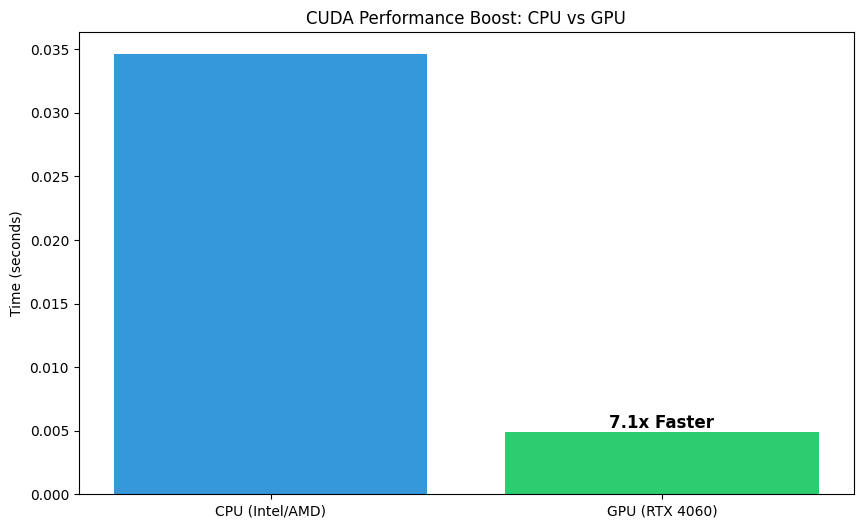

In [4]:
import torch
import time
import matplotlib.pyplot as plt

# 1. Setup and Hardware Check
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Running on: {device.upper()}")
if device == "cuda":
    print(f"GPU Model: {torch.cuda.get_device_name(0)}")

# 2. Define Matrix Size
size = 2000 
# Creating random matrices
cpu_a = torch.randn(size, size)
cpu_b = torch.randn(size, size)

# 3. CPU Benchmark
start_cpu = time.time()
cpu_result = torch.matmul(cpu_a, cpu_b)
end_cpu = time.time()
cpu_time = end_cpu - start_cpu
print(f"CPU Time: {cpu_time:.4f} seconds")

# 4. GPU Benchmark (CUDA)
if device == "cuda":
    # Move data to the RTX 4060
    gpu_a = cpu_a.to(device)
    gpu_b = cpu_b.to(device)
    
    # Warm-up (GPU needs one "dry run" to initialize)
    _ = torch.matmul(gpu_a, gpu_b)
    
    torch.cuda.synchronize() # Wait for initialization
    start_gpu = time.time()
    
    gpu_result = torch.matmul(gpu_a, gpu_b)
    
    torch.cuda.synchronize() # Wait for GPU to finish
    end_gpu = time.time()
    gpu_time = end_gpu - start_gpu
    print(f"GPU Time: {gpu_time:.4f} seconds")
else:
    gpu_time = 0
    print("GPU not available for benchmark.")

# 5. Graphical Message: Results Visualization
labels = ['CPU (Intel/AMD)', 'GPU (RTX 4060)']
times = [cpu_time, gpu_time]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, times, color=['#3498db', '#2ecc71'])
plt.ylabel('Time (seconds)')
plt.title('CUDA Performance Boost: CPU vs GPU')

# Add speedup text
if gpu_time > 0:
    speedup = cpu_time / gpu_time
    plt.text(1, gpu_time, f'{speedup:.1f}x Faster', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()